# ReLU-based ensemble with categorical entity embedding
- ReLu activation, 4 layers, 100 neurons per layer
- PRI_jet_num embedded
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../../')
from modules.basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
NAME = '2_relu_ensemble_embed'

In [3]:
experiment = Experiment(NAME, 'helios_cuda', RESULTS_PATH)

In [4]:
!python ../../modules/data_import.py -d ../../data/ -f PRI_jet_num -s {experiment.seed}

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Converting to use_cartesian coordinates
Converting to use_cartesian coordinates
Training on 200000 datapoints and validating on 50000, using 31 feats:
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_met_px', 'PRI_met_py', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI

## Training

### Import data

In [5]:
train_fy = FoldYielder(DATA_PATH/'train.hdf5')

### Options

In [6]:
n_models = 10
patience = 50
max_epochs = 200
ensemble_size = 10

bs = 256
objective = 'classification'
model_args = {'body':{'act':'relu', 'width':100, 'depth':4}}
opt_args = {'opt':'adam', 'eps':1e-08}
cat_embedder = CatEmbedder.from_fy(train_fy, emb_szs=[3])

n_out = 1
model_builder = ModelBuilder(objective, cont_feats=train_fy.cont_feats, n_out=n_out, cat_embedder=cat_embedder,
                             model_args=model_args, opt_args=opt_args)
Model(model_builder)

Inputs:
30 Continuous: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_sumet', 'PRI_jet_all_pt', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_met_px', 'PRI_met_py', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_met_pt']
                   
1  Categorical: ['PRI_jet_num']
                   
0  Matrix elements: []
                   

Model:
<bound method Module.parameters of Sequential(
  (0): CatEmbHead(
    (embeds): ModuleList(
      (0): Embedding(4, 3)
    )
  )
  (1): FullyConnected(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=33, out_features=100, bias=True)
        (1): ReLU

### Determine LR

LR finder took 2.460s 


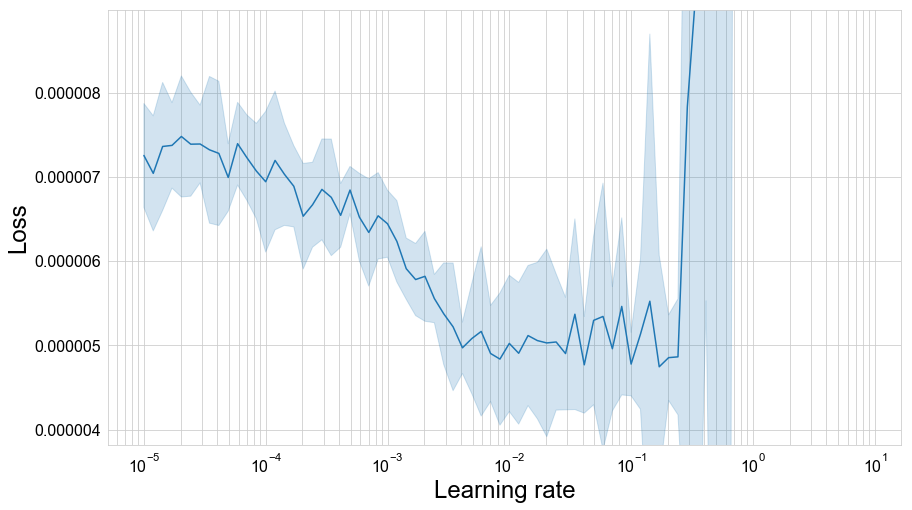

In [7]:
lr_finder = fold_lr_find(train_fy, model_builder, 256, lr_bounds=[1e-5,1e1])

### Train classifier

In [8]:
model_builder.set_lr(2e-3)
callback_partials = []
eval_metrics = {'AMS':AMS(n_total=250000, br=10, wgt_name='gen_weight_original')}

Training model 1 / 10, Val ID = 0


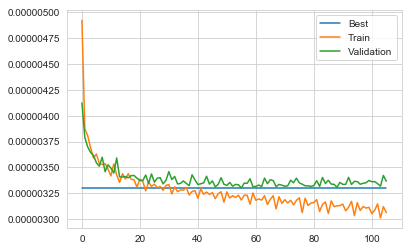

Early stopping after 106 epochs
Scores are: {'loss': 3.3004093893396202e-06, 'AMS': 3.5974443234794227}
Fold took 38.893s

Training model 2 / 10, Val ID = 1


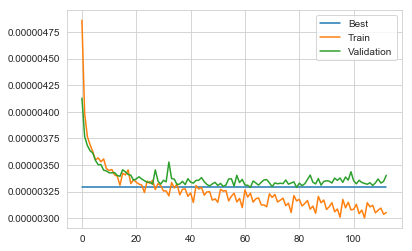

Early stopping after 113 epochs
Scores are: {'loss': 3.2880366234167013e-06, 'AMS': 3.546763089636344}
Fold took 41.537s

Training model 3 / 10, Val ID = 2


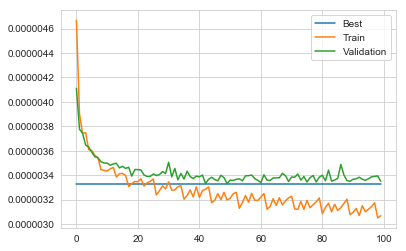

Early stopping after 100 epochs
Scores are: {'loss': 3.3308158435829682e-06, 'AMS': 3.4137412133226555}
Fold took 37.658s

Training model 4 / 10, Val ID = 3


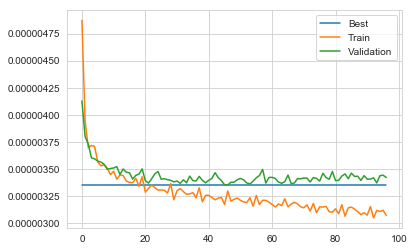

Early stopping after 97 epochs
Scores are: {'loss': 3.3526457627885975e-06, 'AMS': 3.5686969411336977}
Fold took 35.872s

Training model 5 / 10, Val ID = 4


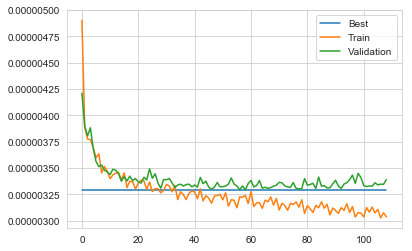

Early stopping after 109 epochs
Scores are: {'loss': 3.2931216082943138e-06, 'AMS': 3.4726230891566243}
Fold took 40.156s

Training model 6 / 10, Val ID = 5


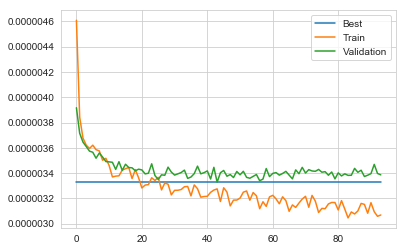

Early stopping after 94 epochs
Scores are: {'loss': 3.328268803670653e-06, 'AMS': 4.145278726761456}
Fold took 34.590s

Training model 7 / 10, Val ID = 6


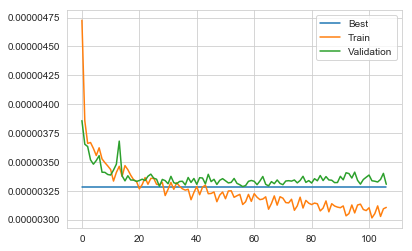

Early stopping after 107 epochs
Scores are: {'loss': 3.286330866103526e-06, 'AMS': 3.727619202550056}
Fold took 39.644s

Training model 8 / 10, Val ID = 7


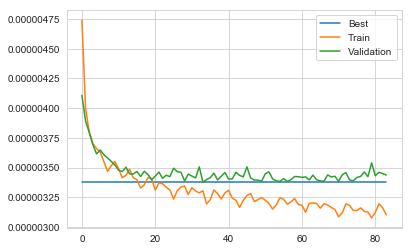

Early stopping after 84 epochs
Scores are: {'loss': 3.3774319945223397e-06, 'AMS': 3.3129163556417263}
Fold took 31.267s

Training model 9 / 10, Val ID = 8


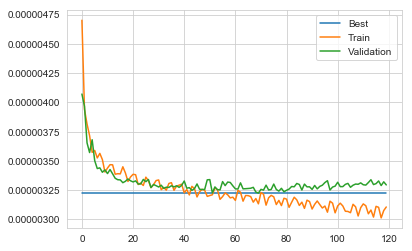

Early stopping after 120 epochs
Scores are: {'loss': 3.225639829906868e-06, 'AMS': 3.5350198373587745}
Fold took 44.622s

Training model 10 / 10, Val ID = 9


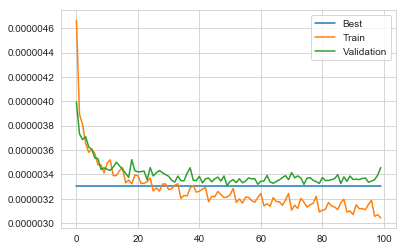

Early stopping after 100 epochs
Scores are: {'loss': 3.307487986603519e-06, 'AMS': 3.682082248750704}
Fold took 37.283s


______________________________________
Training finished
Cross-validation took 381.525s 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

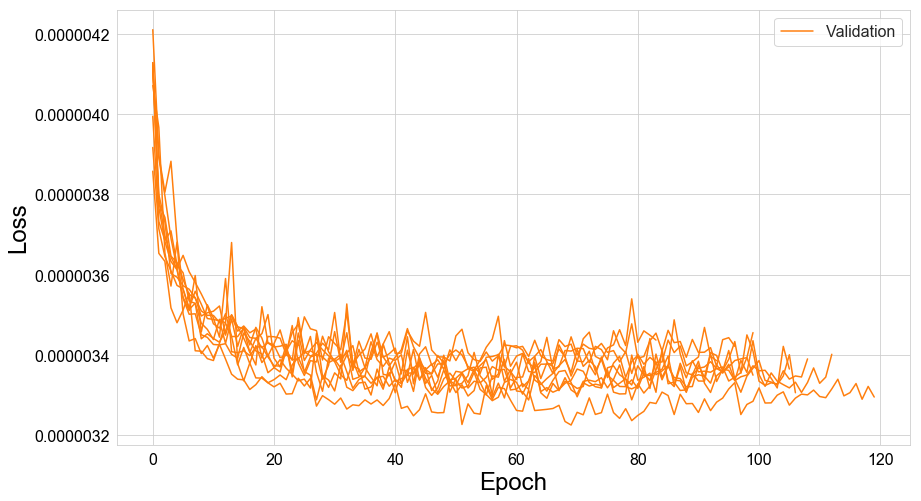

Mean loss = 3.31e-06±1e-08
Mean AMS = 3.6±0.07
______________________________________



In [9]:
train_timer = timeit.default_timer()
results, histories, cycle_losses = fold_train_ensemble(train_fy, n_models,
                                                       model_builder=model_builder,
                                                       bs=bs,
                                                       callback_partials=callback_partials,
                                                       eval_metrics=eval_metrics,
                                                       max_epochs=max_epochs, patience=patience)
train_time = timeit.default_timer()-train_timer
experiment['train_time'] = train_time

## Inference

### Construct ensemble

In [10]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [11]:
ensemble = Ensemble.from_results(results, ensemble_size, model_builder, metric='loss', higher_metric_better=False)

Choosing ensemble by loss


Model 0 is 8 with loss = 3.225639829906868e-06
Model 1 is 6 with loss = 3.286330866103526e-06
Model 2 is 1 with loss = 3.2880366234167013e-06
Model 3 is 4 with loss = 3.2931216082943138e-06
Model 4 is 0 with loss = 3.3004093893396202e-06
Model 5 is 9 with loss = 3.307487986603519e-06
Model 6 is 5 with loss = 3.328268803670653e-06
Model 7 is 2 with loss = 3.3308158435829682e-06
Model 8 is 3 with loss = 3.3526457627885975e-06
Model 9 is 7 with loss = 3.3774319945223397e-06


### Validation

#### Response on validation data

In [12]:
val_fy = FoldYielder(DATA_PATH/'val.hdf5')

In [13]:
val_timer = timeit.default_timer()
ensemble.predict(val_fy)
val_time = timeit.default_timer()-val_timer
experiment['val_time'] = val_time

Mean time per event = 1.97e-06±3e-08


In [14]:
val_df = val_fy.get_df()

50000 datapoints loaded


Mean cut at 0.933860182762146 corresponds to AMS of 3.513307910557617
Maximum AMS for data is 3.550323467077133 at cut of 0.9448472857475281


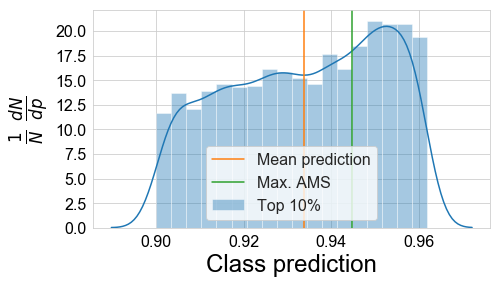

In [15]:
cut, experiment['val_ams_smooth'], experiment['val_ams_max'] = binary_class_cut_by_ams(val_df, top_perc=10, br=10, wgt_factor=250000/50000)

### Testing

#### Test scoring 

In [16]:
test_fy = FoldYielder(DATA_PATH/'test.hdf5')

In [17]:
test_timer = timeit.default_timer()
ensemble.predict(test_fy)
test_time = timeit.default_timer()-test_timer
experiment['test_time'] = test_time

Mean time per event = 8.1e-07±1e-08


In [18]:
experiment['test_public_ams_mean'], experiment['test_private_ams_mean'] = score_test_data_per_fold(test_fy, cut, pred_name='pred')

Mean Public:Private AMS: 3.65±0.09 : 3.59±0.04


In [19]:
experiment['test_public_ams'], experiment['test_private_ams'] = score_test_data(test_fy, cut, pred_name='pred')

Public:Private AMS: 3.6373890457240887 : 3.5883705701960937


## Results 

In [20]:
experiment

Experiment:	2_relu_ensemble_embed
Machine:	helios_cuda
Device:	Nvidia GeForce GTX 1080 Ti GPU
train_time	381.8890184360007
val_time	0.104592037000657
val_ams_smooth	3.513307910557617
val_ams_max	3.550323467077133
test_time	0.454633737000222
test_public_ams_mean	(3.6512074344443937, 0.08867613686642134)
test_private_ams_mean	(3.593927366897212, 0.04073667926684181)
test_public_ams	3.6373890457240887
test_private_ams	3.5883705701960937

In [21]:
experiment.save()